# Predicción de Diabetes Tipo 2 – Exploración y Limpieza de Datos

Este notebook realiza el análisis exploratorio, limpieza y preprocesamiento del dataset Pima Indians Diabetes, incluyendo imputación de valores clínicos inválidos con `KNNImputer`.

In [3]:
#Importar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# Cargar el dataset
df = pd.read_csv("../data/diabetes.csv")

## Investigación general del dataset

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Visualización de las variables clínicas (sin los valores inválidos)

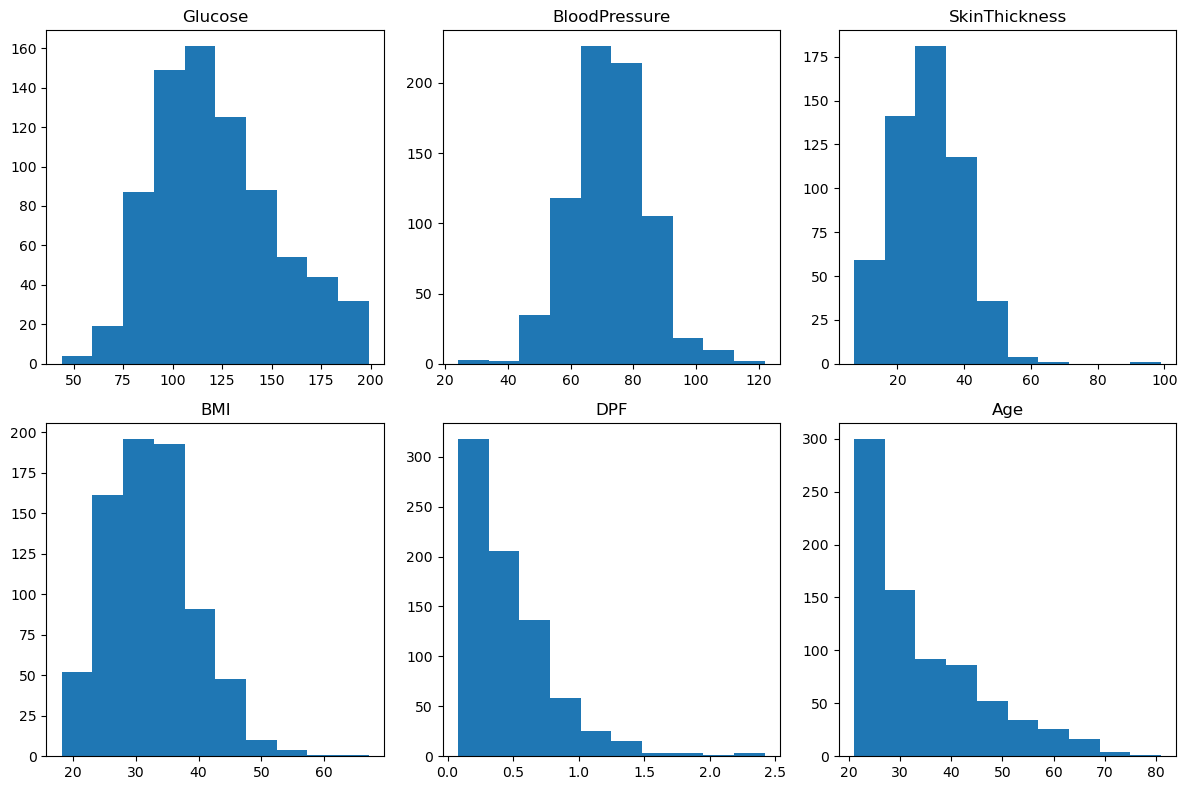

In [11]:
import seaborn as sns

fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.flatten()

axs[0].hist(df[df['Glucose'] != 0]['Glucose'], bins=10)
axs[0].set_title('Glucose')

axs[1].hist(df[df['BloodPressure'] != 0]['BloodPressure'], bins=10)
axs[1].set_title('BloodPressure')

axs[2].hist(df[df['SkinThickness'] != 0]['SkinThickness'], bins=10)
axs[2].set_title('SkinThickness')

axs[3].hist(df[df['BMI'] != 0]['BMI'], bins=10)
axs[3].set_title('BMI')

axs[4].hist(df[df['DiabetesPedigreeFunction'] != 0]['DiabetesPedigreeFunction'], bins=10)
axs[4].set_title('DPF')

axs[5].hist(df[df['Age'] != 0]['Age'], bins=10)
axs[5].set_title('Age')

plt.tight_layout()
plt.show()


Con las graficas se puede evidenciar que la glucose tiene un sesgo positivo, las variables DiabetesPedigreeFunction, SkinThickness, BMI y Age presentan un sesgo negativo, obteniendo solamente la BloodPressure como una variable simetrica

##  Reemplazo de los valores inválidos con NaN 

In [16]:
df.loc[(df['SkinThickness'] == 0) | (df['SkinThickness'] >= 60), 'SkinThickness'] = np.nan
df.loc[(df['Glucose'] == 0), 'Glucose'] = np.nan
df.loc[(df['BloodPressure'] == 0), 'BloodPressure'] = np.nan
df.loc[(df['Insulin'] == 0 ), 'Insulin'] = np.nan
df.loc[(df['BMI'] == 0 ), 'BMI'] = np.nan

## Determinar el número de vecinos a utilizar en el imputador 

In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.impute import KNNImputer

columnas_a_imputar = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_imputada=df[columnas_a_imputar]

subset = df_imputada.dropna().sample(frac=0.3, random_state=1)

subset_nan = subset.copy()
subset_nan.iloc[0:10, 0] = np.nan 

for k in [3, 5, 7, 10]:
    imputer = KNNImputer(n_neighbors=k)
    imputed = imputer.fit_transform(subset_nan)
    mae = mean_absolute_error(subset.iloc[0:10, 0], imputed[0:10, 0])
    print(f'k={k}, MAE={mae:.3f}')

k=3, MAE=14.633
k=5, MAE=14.600
k=7, MAE=13.829
k=10, MAE=14.140


## Imputación de los valores faltantes con KNNImputer

In [23]:
columnas_a_imputar = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Subset para imputar
df_para_imputar = df[columnas_a_imputar].copy()

# Imputador con k=7 (basado en validación)
imputador = KNNImputer(n_neighbors=7)
df_imputado_array = imputador.fit_transform(df_para_imputar)

# Convertir a DataFrame
df_imputado = pd.DataFrame(df_imputado_array, columns=columnas_a_imputar)

# Reemplazar columnas originales
df[columnas_a_imputar] = df_imputado

## Verificación final de la imputación

In [26]:
df[columnas_a_imputar].isnull().sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

## Visualización de las variables clínicas despues de imputar el DataFrame

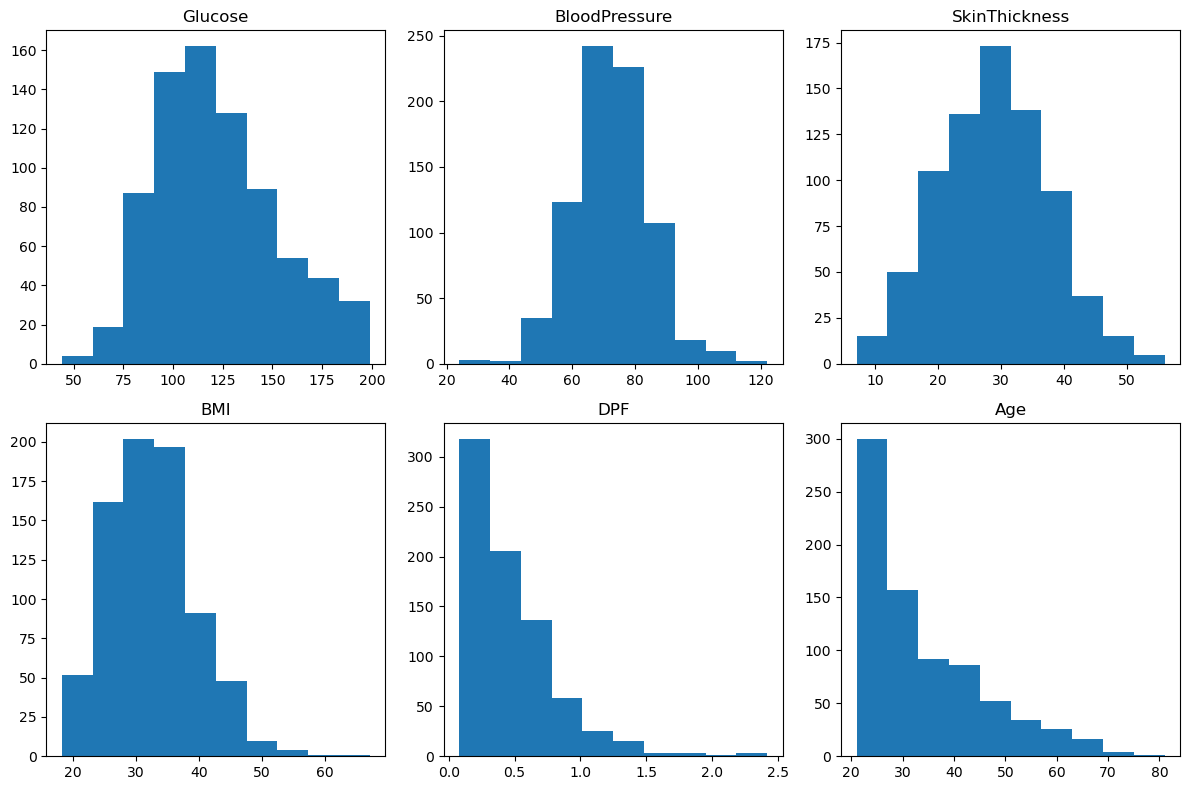

In [29]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.flatten()

axs[0].hist(df[df['Glucose'] != 0]['Glucose'], bins=10)
axs[0].set_title('Glucose')

axs[1].hist(df[df['BloodPressure'] != 0]['BloodPressure'], bins=10)
axs[1].set_title('BloodPressure')

axs[2].hist(df[df['SkinThickness'] != 0]['SkinThickness'], bins=10)
axs[2].set_title('SkinThickness')

axs[3].hist(df[df['BMI'] != 0]['BMI'], bins=10)
axs[3].set_title('BMI')

axs[4].hist(df[df['DiabetesPedigreeFunction'] != 0]['DiabetesPedigreeFunction'], bins=10)
axs[4].set_title('DPF')

axs[5].hist(df[df['Age'] != 0]['Age'], bins=10)
axs[5].set_title('Age')

plt.tight_layout()
plt.show()

Las gráficas de la dispersión de cada una de las variables nos pueden ver que, después de imputar, la variable  SkinThickness ahora es simétrica y las variables BMI, DPF y Age tienen un leve sesgo negativo.

## Exportacion del nuevo DataFrame

In [33]:
df.to_csv("diabetes_imputado.csv", index=False)

## Análisis de la relación entre las variables y el diagnóstico

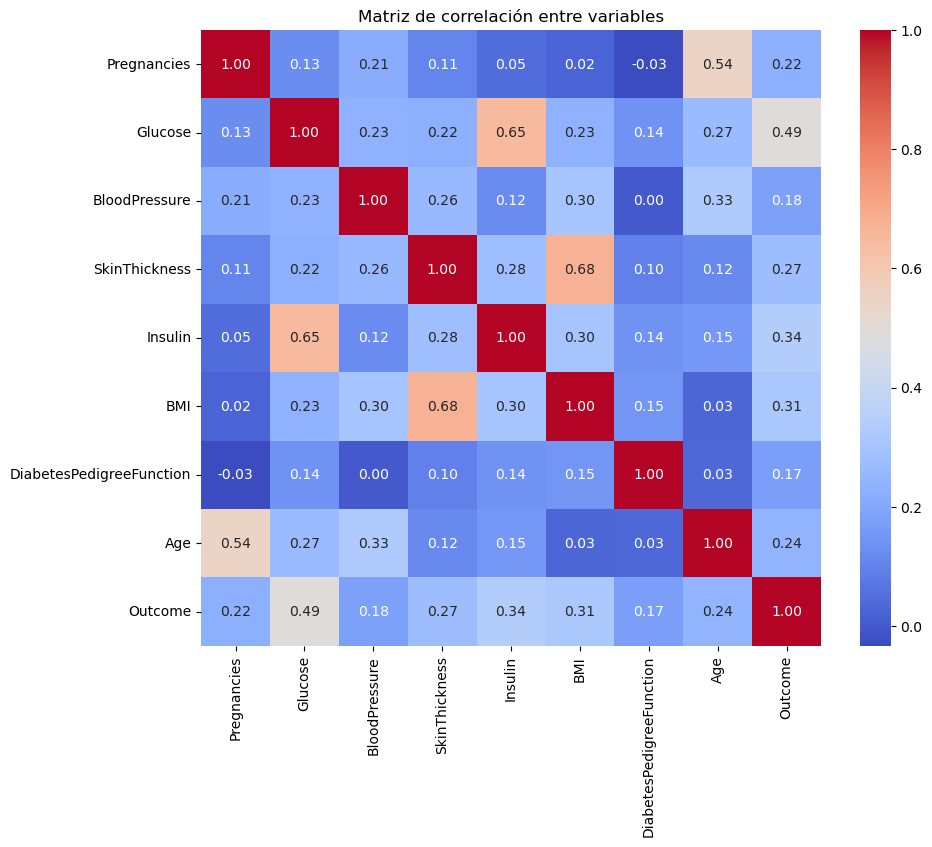

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables")
plt.show()

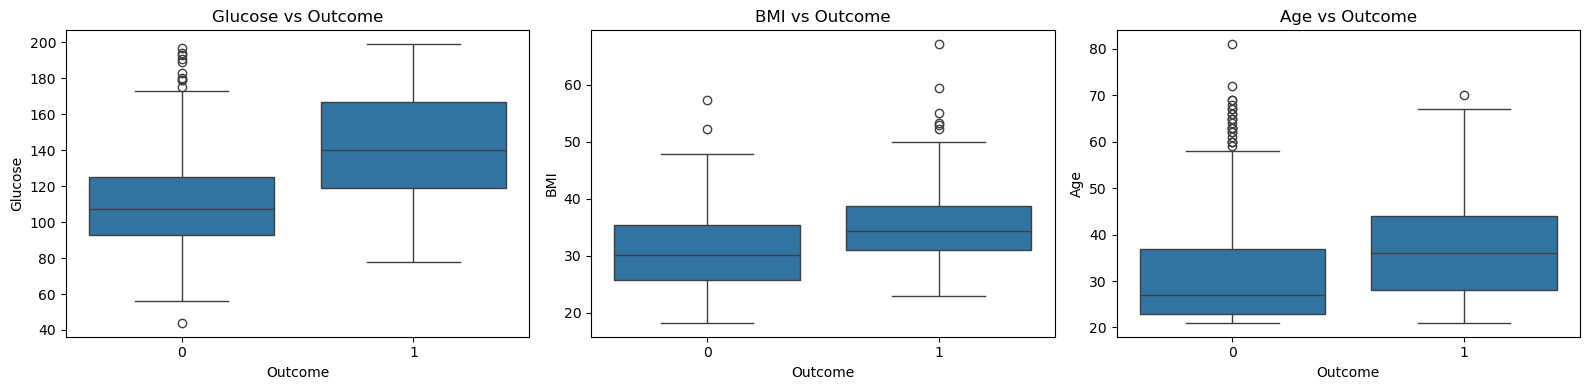

In [38]:
variables_a_graficar = ['Glucose', 'BMI', 'Age']

plt.figure(figsize=(16, 4))

for i, var in enumerate(variables_a_graficar):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Outcome', y=var, data=df)
    plt.title(f'{var} vs Outcome')

plt.tight_layout()
plt.show()

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Mejores hiperparámetros: {'class_weight': 'balanced', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 161}
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       100
           1       0.58      0.72      0.64        54

    accuracy                           0.72       154
   macro avg       0.70      0.72      0.71       154
weighted avg       0.74      0.72      0.73       154

ROC AUC: 0.827037037037037


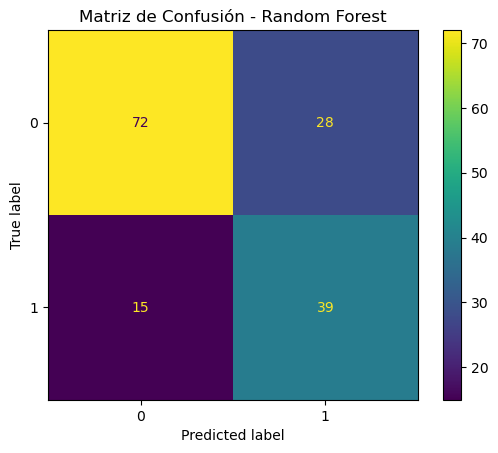

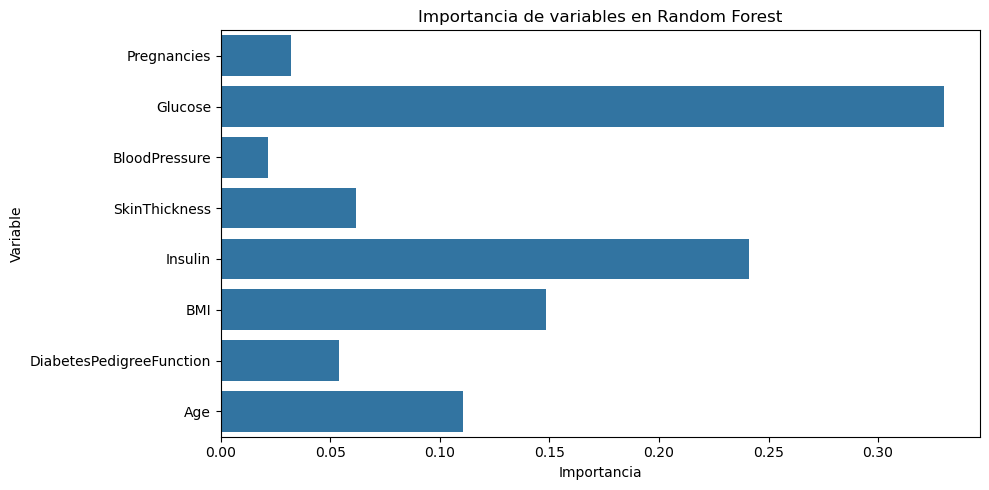

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
)

# 1. Seleccionar variables predictoras y objetivo
X = df.drop(columns='Outcome')
y = df['Outcome']

# 2. Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Definición del espacio de búsqueda
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(4, 15),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']  # mantenemos el balanceo
}

# Instancia base del modelo
rf = RandomForestClassifier(random_state=42)

# Configuración del RandomizedSearchCV
rs = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,  # número de combinaciones a probar
    scoring='f1',  # puedes usar 'roc_auc', 'recall' o 'f1'
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Ejecutar búsqueda
rs.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = rs.best_estimator_
print("Mejores hiperparámetros:", rs.best_params_)

# Evaluación en test
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

# 6. Matriz de confusión
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title("Matriz de Confusión - Random Forest")
plt.show()

# 7. Importancia de variables
importancia = best_model.feature_importances_
variables = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=importancia, y=variables)
plt.title("Importancia de variables en Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

In [55]:
import joblib
joblib.dump(best_model, '../models/modelo_diabetes_random_forest.pkl')

['../models/modelo_diabetes_random_forest.pkl']

In [57]:
df.to_csv("../data/diabetes_imputado_modelado.csv", index=False)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
🔍 Mejores hiperparámetros LogisticRegression:
{'logreg__C': 1, 'logreg__penalty': 'l1', 'logreg__solver': 'saga'}
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       100
           1       0.60      0.69      0.64        54

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154

ROC AUC: 0.811111111111111


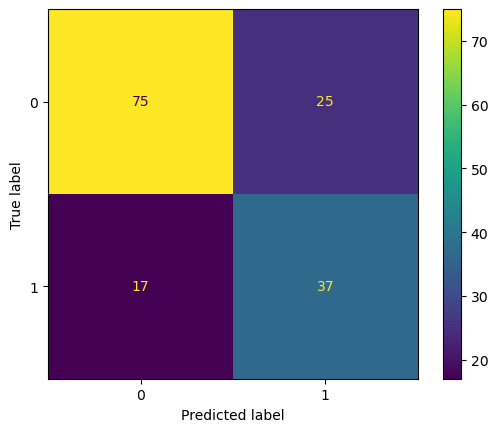

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline con escalado + modelo
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

# Espacio de búsqueda
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear', 'saga']
}

# Grid Search con validación cruzada
grid_lr = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_lr.fit(X_train, y_train)

# Evaluación
best_lr = grid_lr.best_estimator_
print("🔍 Mejores hiperparámetros LogisticRegression:")
print(grid_lr.best_params_)

y_pred_lr = best_lr.predict(X_test)
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
ConfusionMatrixDisplay.from_estimator(best_lr, X_test, y_test)

In [65]:
import joblib
joblib.dump(best_lr , '../models/modelo_LogisticRegression_diabetes.pkl')

['../models/modelo_LogisticRegression_diabetes.pkl']

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\felip\anaconda3\envs\Prueba\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:22:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔍 Mejores hiperparámetros XGBoost:
{'colsample_bytree': np.float64(0.8232408008069365), 'gamma': np.float64(0.8076723421160816), 'learning_rate': np.float64(0.02297844942179631), 'max_depth': 4, 'n_estimators': 151, 'scale_pos_weight': 1.5, 'subsample': np.float64(0.8785217091359153)}
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       100
           1       0.64      0.70      0.67        54

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154

ROC AUC: 0.8311111111111111


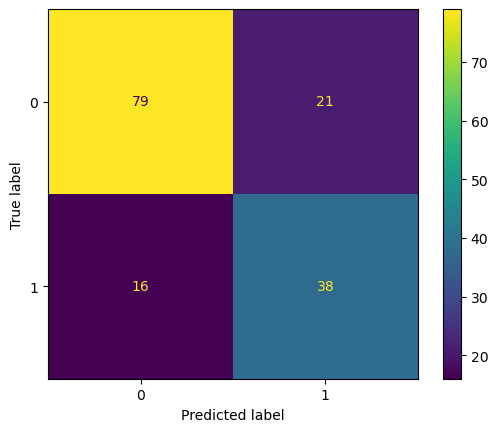

In [61]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Espacio de búsqueda
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 2),
    'scale_pos_weight': [1, 1.5, 2]
}

# Búsqueda aleatoria
rs_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42)

rs_xgb.fit(X_train, y_train)

best_xgb = rs_xgb.best_estimator_
print("🔍 Mejores hiperparámetros XGBoost:")
print(rs_xgb.best_params_)

y_pred_xgb = best_xgb.predict(X_test)
y_prob_xgb = best_xgb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_xgb))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [63]:
import joblib
joblib.dump(best_xgb, '../models/modelo_xgboost_diabetes.pkl')

['../models/modelo_xgboost_diabetes.pkl']

## 📍 Conclusión Final

Se entrenaron y compararon tres modelos (Logistic Regression, Random Forest, XGBoost) para predecir la presencia de diabetes tipo 2 en pacientes.

Tras limpieza e imputación de datos clínicos, el modelo XGBoost optimizado logró:
- **Recall = 0.70**
- **F1-score = 0.67**
- **ROC AUC = 0.83**

Este modelo se seleccionó como final por su capacidad para identificar correctamente casos positivos (alta sensibilidad) sin sacrificar precisión.

El proyecto demuestra habilidades completas en:
- Preprocesamiento clínico
- Imputación avanzada
- Modelado y evaluación crítica